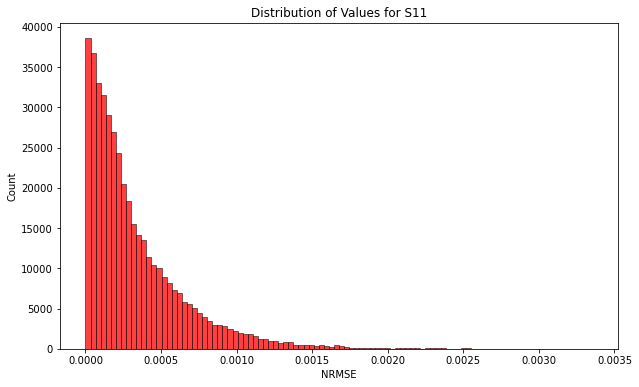

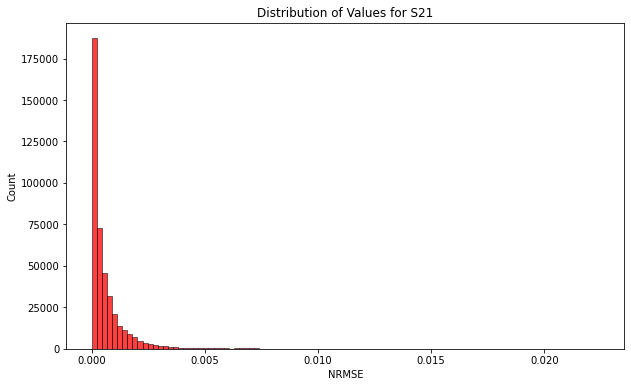

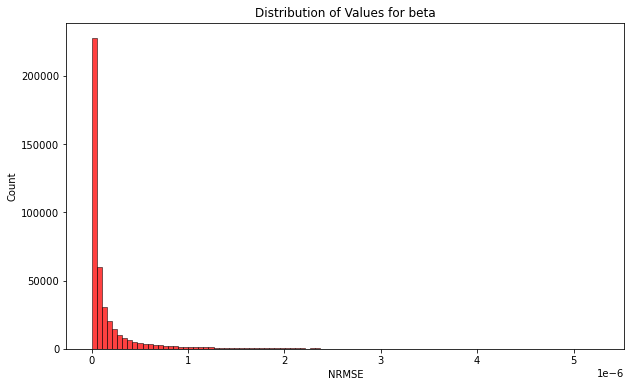

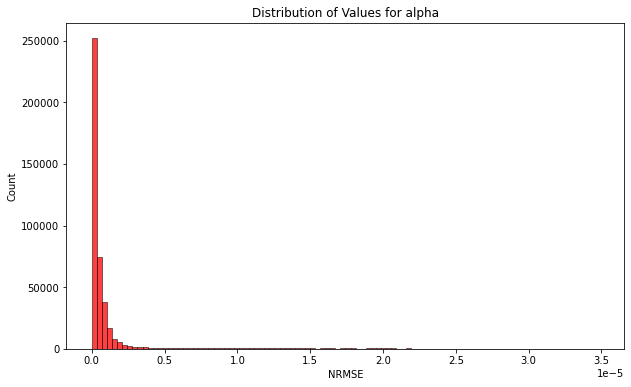

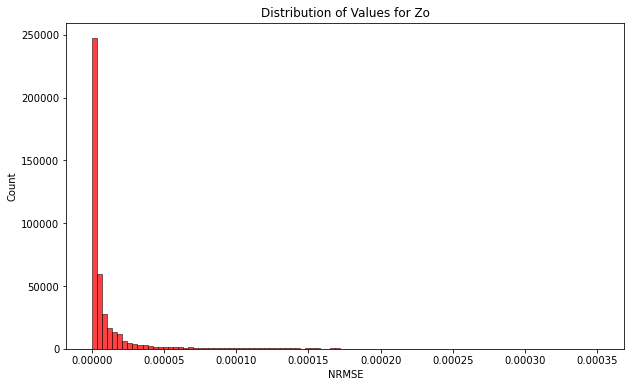

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定資料夾路徑
folder_path = 'NRMSE'

# 定義列標題
columns = ['S11', 'S21', 'beta', 'alpha', 'Zo']

# 創建一個字典來存儲所有檔案的數據
all_data = {col: [] for col in columns}

# 讀取資料夾中的所有CSV檔案
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, header=None)
        
        # 確保每個檔案都有5行
        if df.shape[1] != 5:
            print(f"警告: {filename} 沒有5行數據。跳過此檔案。")
            continue
        
        # 將每個檔案的數據添加到對應的列表中
        for i, col in enumerate(columns):
            all_data[col].extend(pd.to_numeric(df.iloc[:, i], errors='coerce').dropna())

# 繪製每一列數值的分佈圖
for i, col in enumerate(columns):
    plt.figure(figsize=(10, 6))
    
    # 取得該列的數據
    data = all_data[col]
    
    # 繪製長條圖
    sns.histplot(data, bins=100, color='red', kde=False, stat='count')
    plt.title(f'Distribution of Values for {col}')
    plt.ylabel('Count')
    plt.xlabel('NRMSE')
    plt.show()